# Fifa 2018 Exploratory Data Analysis
### by Ronny Meza

## Objective 1

In this section it is necessary to know what languages are the best for translating the game into many others (this is <font color=blue>Localizate the Game</font> ). For that, we have information about the player of one ours games.

In [71]:
#Libraries
import numpy as np
import pandas as pd
import csv
import re
import sqlite3
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import requests
import pylab as pl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import tweepy 
from textblob import TextBlob 
import seaborn as sns
from twython import TwythonStreamer

In [2]:
#Reading Data
fifa18_data = pd.read_csv('fifa-18-demo-player-dataset/CompleteDataset.csv', index_col = 'Unnamed: 0')

/home/ronny/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking the header
fifa18_data.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred_Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [4]:
#Dataframe visualization
fifa18_data.iloc[:5, :11]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K


In the previous table it is possible to see that ```Value``` and ```Wage``` are expressed in abbreviated format and indicate the currency type. Previous to import to DB it is necessary to transform these columns to numbers.

In [5]:
#Adjusting Wage and Value columns 
fifa18_data['Wage'] = fifa18_data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
fifa18_data['Value'] = fifa18_data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

In [6]:
#Dataframe visualization
fifa18_data.iloc[:5, :11]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,955000000,565000
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000,565000
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000,280000
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000,510000
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000,230000


In [7]:
#DataFrame size
print(fifa18_data.shape)

(17981, 74)


In [8]:
#DataBase creation
conexion = sqlite3.connect('data_base.db')

cur = conexion.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS fifa_2018(Name text, Age integer, Photo text, Nationality text, Flag text, Overall integer, Potential integer, Club text, Club_logo text, Value_EU integer,  Wage_EU integer, Special integer, Acceleration integer, Aggression integer, Agility integer, Balance integer, Ball_control integer, Composure integer, Crossing integer, Curve integer, Dribbling integer, Finishing integer, Free_kick_accuracy integer, GK_diving integer, GK_handling integer, GK_kicking integer, GK_positioning integer, GK_reflexes integer, Heading accuracy integer, Interceptions integer, Jumping integer, Long_passing integer, Long_shots integer, Marking integer, Penalties integer, Positioning integer, Reactions integer, Short_passing integer, Shot_power integer, Sliding_tackle integer, Sprint_speed integer, Stamina integer, Standing_tackle integer, Strength integer, Vision integer, Volleys integer, CAM integer, CB integer, CDM integer, CF integer, CM integer, ID integer, LAM integer, LB integer, LCB integer, LCM integer, LDM integer, LF integer, LM integer, LS integer, LW integer, LWB integer, Preferred_Positions text, RAM integer, RB integer, RCB integer, RCM integer, RDM integer, RF integer, RM integer, RS integer, RW integer, RWB integer, ST integer)")

conexion.commit()
conexion.close()

In [9]:
#Loading data into DataBase
conexion = sqlite3.connect('data_base.db')

cur = conexion.cursor()
 
cur.executemany('''insert into fifa_2018 values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', fifa18_data.values.tolist())

conexion.commit()
conexion.close()

In [10]:
#Realizing connection tests with database using a query
conexion = sqlite3.connect('data_base.db')

cur = conexion.cursor()

respuesta = cur.execute('SELECT Name FROM fifa_2018 WHERE Age >= 40')

print(respuesta.fetchall())

conexion.commit()
conexion.close()

[('M. Storari',), ('B. Nivet',), ('T. Simons',), ('M. Candelo',), ('O. Pérez',), ('E. El Hadary',), ('Quim',), ('K. Wæhler',), ('L. Butrón',), ('M. Tyler',), ('M. Brown',), ('C. Day',), ('W. Brown',), ('D. Coyne',), ('J. Walker',), ('B. Richardson',), ('M. Storari',), ('B. Nivet',), ('T. Simons',), ('M. Candelo',), ('O. Pérez',), ('E. El Hadary',), ('Quim',), ('K. Wæhler',), ('L. Butrón',), ('M. Tyler',), ('M. Brown',), ('C. Day',), ('W. Brown',), ('D. Coyne',), ('J. Walker',), ('B. Richardson',), ('M. Storari',), ('B. Nivet',), ('T. Simons',), ('M. Candelo',), ('O. Pérez',), ('E. El Hadary',), ('Quim',), ('K. Wæhler',), ('L. Butrón',), ('M. Tyler',), ('M. Brown',), ('C. Day',), ('W. Brown',), ('D. Coyne',), ('J. Walker',), ('B. Richardson',), ('M. Storari',), ('B. Nivet',), ('T. Simons',), ('M. Candelo',), ('O. Pérez',), ('E. El Hadary',), ('Quim',), ('K. Wæhler',), ('L. Butrón',), ('M. Tyler',), ('M. Brown',), ('C. Day',), ('W. Brown',), ('D. Coyne',), ('J. Walker',), ('B. Richardson

In the previous query it is possible to see the players with ages superior to **40 year old**. The query shows that the database is working.

## Exploratory Data Analysis

In this section the principal objective it is to do an Exploratory data analysis of the FIFA 2018 Player dataset that; the main analysis will be the ```different languages of the players speak```.

In [11]:
no_players = fifa18_data.shape[0]
nationality = fifa18_data.groupby('Nationality')['ID'].count().size

print('The complete data set consist of', no_players, 'players grouped into', nationality, 'nationalities')

The complete data set consist of 17981 players grouped into 165 nationalities


In [12]:
nationality_list = fifa18_data.groupby('Nationality')['ID'].count().sort_values(ascending=False)
nationality_list[:30]

Nationality
England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Austria                 266
Switzerland             233
Australia               227
Uruguay                 153
Serbia                  133
Name: ID, dtype: int64

In the previous list it is possible to see that the information is not enough because, the nationality does not create language groups. For example, ```Argentina, Colombia, Chile, Uruguay, and Paraguay``` speak Spanish with some variation according to the region, but the *official language is Spanish*. This case applies too for English speaking people. So, for creating a better analysis will be necessary to create a new array with official language for every nationality. 

Using the information available in [Countries and their spoken languages - for developers](http://www.fullstacks.io/2016/07/countries-and-their-spoken-languages.html). I downloaded the CSV file and I updated the empty cells using information about official languages from [Wikipedia](https://en.wikipedia.org/) and [Wordatlas](https://www.worldatlas.com/)  

In [13]:
#Loadind language list by country
language = pd.read_csv('country_list.csv')
language[:5]

,ID,country_name,country_code_name,country_code,lang_name
0,1,Afghanistan,af,93,Pashto
1,2,Albania,al,355,Albanian
2,3,Algeria,dz,213,Tamazight(Latin)
3,4,American Samoa,as,1684,English
4,5,Andorra,ad,376,Catalan


In [14]:
#The list shows the language more used by country
language_list = language.groupby('lang_name')['ID'].count().sort_values(ascending=False)
language_list[:10]

lang_name
English                         54
French                          25
Spanish                         21
Arabic                          17
Portuguese                       8
Serbian (Latin)                  3
German                           3
Chinese (Traditional) legacy     3
Albanian                         2
Dutch                            2
Name: ID, dtype: int64

In [15]:
#Adapting the data
player_country = list(fifa18_data['Nationality'])
player_country = [element.upper() for element in player_country]

language_2 = language[['country_name','lang_name']]
language_2 = language_2.apply(lambda x: x.astype(str).str.upper())

In [16]:
#Code for to search match between player nationality and language
language_match = []

for i in player_country:
    for j,k in zip(language_2['country_name'], language_2['lang_name']):
        if i==j:
            language_match.append(k)

In [17]:
#Playes languages (sample list)
language_match[:5]

['PORTUGUESE', 'SPANISH', 'PORTUGUESE', 'SPANISH', 'GERMAN']

In [18]:
#New DataFrame for Football Players
player_name = fifa18_data['Name']
players_lang = pd.DataFrame(list(zip(player_name, player_country, language_match)), 
               columns =['Name', 'Country', 'Language'])
players_lang.head()

,Name,Country,Language
0,Cristiano Ronaldo,PORTUGAL,PORTUGUESE
1,L. Messi,ARGENTINA,SPANISH
2,Neymar,BRAZIL,PORTUGUESE
3,L. Suárez,URUGUAY,SPANISH
4,M. Neuer,GERMANY,GERMAN


In [19]:
#Saving the Football Players languages file as CSV
players_lang.to_csv('Player_Languages.csv')

In [20]:
#Table that show how many futbol player have a common languages
counting_lang = Counter(language_match)
lang_sorted = sorted(counting_lang.items(), key=lambda pair: pair[1], reverse=True)
lang_sorted[:25]

[('SPANISH', 3755),
 ('ENGLISH', 2989),
 ('GERMAN', 1409),
 ('PORTUGUESE', 1236),
 ('OCCITAN', 978),
 ('ITALIAN', 799),
 ('FRENCH', 683),
 ('ARABIC', 503),
 ('JAPANESE', 469),
 ('SWEDISH', 430),
 ('FRISIAN', 429),
 ('IRISH', 417),
 ('DANISH', 346),
 ('POLISH', 337),
 ('KOREAN', 336),
 ('SAMI (SOUTHERN)', 333),
 ('YAKUT', 306),
 ('TURKISH', 291),
 ('ROMANSH', 233),
 ('SERBIAN (LATIN)', 213),
 ('WOLOF', 129),
 ('YORUBA', 126),
 ('CROATIAN', 109),
 ('GREEK', 109),
 ('SETSWANA', 77)]

# Working with JSON Files

The ```JSON``` file present several problems when this one is downloaded from the GitHub web page, because the file downloaded is not a ```JSON``` file; by the contrary the file has information about GitHub user, avatar, download day and another. So, the best way to get the right information was to open the direct link in Chrome navigator. Then I copy the text information and I did paste it into a ```Google JSON Editor``` application. After, I downloaded the file fixed. 

In [21]:
#Importing Countries data from JSON file

with open('countries_validated.json') as json_count:
    data_count = json.load(json_count)  

print(data_count['AD'])

{'name': 'Andorra', 'native': 'Andorra', 'phone': '376', 'continent': 'EU', 'capital': 'Andorra la Vella', 'currency': 'EUR', 'languages': ['ca']}


In [22]:
#Antarctica doesn't have language define, so this data have to be deleted
del data_count['AQ']

In [23]:
#Tranforming the Countries dictionary in a dataframe
countries_df = pd.DataFrame.from_dict(data_count, orient='index')
countries_df[:5]

,name,native,phone,continent,capital,currency,languages
AD,Andorra,Andorra,376,EU,Andorra la Vella,EUR,[ca]
AE,United Arab Emirates,دولة الإمارات العربية المتحدة,971,AS,Abu Dhabi,AED,[ar]
AF,Afghanistan,افغانستان,93,AS,Kabul,AFN,"[ps, uz, tk]"
AG,Antigua and Barbuda,Antigua and Barbuda,1268,NA,Saint John's,XCD,[en]
AI,Anguilla,Anguilla,1264,NA,The Valley,XCD,[en]


In [24]:
#Importing Languaje data from JSON file

with open('languages_validated.json') as json_data:
    data_lang = json.load(json_data)  

print(data_lang['ca'])

{'name': 'Catalan', 'native': 'Català'}


In [25]:
#Tranforming the language dictionary in a dataframe
languages_df = pd.DataFrame.from_dict(data_lang, orient='index')
languages_df[:5]

,name,native,rtl
aa,Afar,Afar,NaN
ab,Abkhazian,Аҧсуа,NaN
af,Afrikaans,Afrikaans,NaN
ak,Akan,Akana,NaN
am,Amharic,አማርኛ,NaN


In [26]:
#Creating a new list with countries name 
country_list =  list(countries_df['name'])
country_list[:5]

['Andorra',
 'United Arab Emirates',
 'Afghanistan',
 'Antigua and Barbuda',
 'Anguilla']

In [27]:
#Creating a new list with languages
languages_list = list(languages_df['name'])
languages_list[:5]

['Afar', 'Abkhazian', 'Afrikaans', 'Akan', 'Amharic']

In [28]:
#Creating new list with countries languages
country_lang =  list(countries_df.iloc[:,6])
country_lang[:5]

[['ca'], ['ar'], ['ps', 'uz', 'tk'], ['en'], ['en']]

In [29]:
#Create a new list with the firt element in every row
country_lang = filter(None, country_lang) #Remove empty row for Antartida

new_list = []
for value in country_lang:
    new_list.append(value[0])

In [30]:
new_list[:5]

['ca', 'ar', 'ps', 'en', 'en']

In [31]:
#Extracting index from the list
aux_list = languages_df.iloc[:, [0]]
aux_list = aux_list.index.tolist()
aux_list[:5]

['aa', 'ab', 'af', 'ak', 'am']

In [32]:
#Searching match between country languages code from countries and languages data
language_match2 = []

for i in new_list:
    for j,k in zip(aux_list, languages_list):
        if i==j:
            language_match2.append(k)

In [33]:
language_match2[:5]

['Catalan', 'Arabic', 'Pashto', 'English', 'English']

In [34]:
#New DataFrame with information about countries and country's language 
New_df = pd.DataFrame(list(zip(country_list, language_match2)), 
               columns =['Country', 'Language'])
New_df[:5] 

,Country,Language
0,Andorra,Catalan
1,United Arab Emirates,Arabic
2,Afghanistan,Pashto
3,Antigua and Barbuda,English
4,Anguilla,English


In [35]:
#Saving the file as CSV
New_df.to_csv('Countries_Languages.csv')

## Objective 2

In this section it is necessary to build a Data Visualization of the data FIFA game by country and languages. Clustering to help us for take the best decisions for Localization.

/home/ronny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


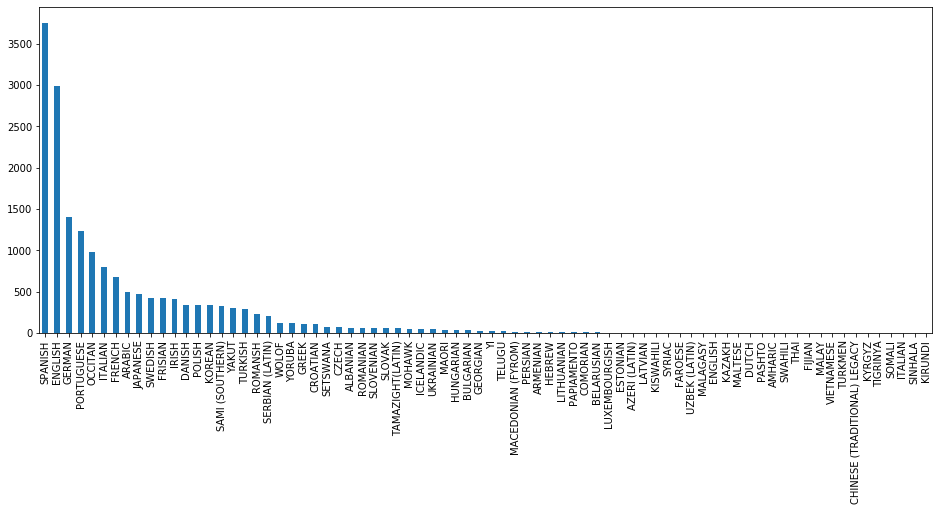

In [36]:
#Histogram for playes languages
fig = plt.figure(figsize=(16,6))
pd.Series(language_match).value_counts().plot('bar')
plt.show()

In [37]:
#Grouping by player
players = fifa18_data[["Name", "Age", "Club"]]
columnsRequired = ["Name", "Age", "Club"]
players = fifa18_data[columnsRequired]
players[:10]

,Name,Age,Club
0,Cristiano Ronaldo,32,Real Madrid CF
1,L. Messi,30,FC Barcelona
2,Neymar,25,Paris Saint-Germain
3,L. Suárez,30,FC Barcelona
4,M. Neuer,31,FC Bayern Munich
5,R. Lewandowski,28,FC Bayern Munich
6,De Gea,26,Manchester United
7,E. Hazard,26,Chelsea
8,T. Kroos,27,Real Madrid CF
9,G. Higuaín,29,Juventus


In [38]:
# Finding the average age of players in each team
player_mean_age = players.groupby("Club").mean()

(18, 32)

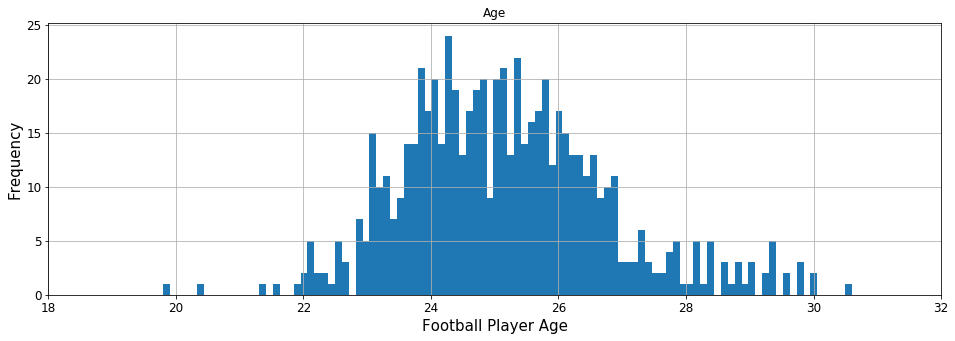

In [39]:
#Histogram for playes languages
player_mean_age.hist(bins=100, grid=True, xlabelsize=12, ylabelsize=12, figsize=(16,5))
plt.xlabel("Football Player Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([18,32])

Text(0.5, 0.98, "Players'Nationality Histogram")

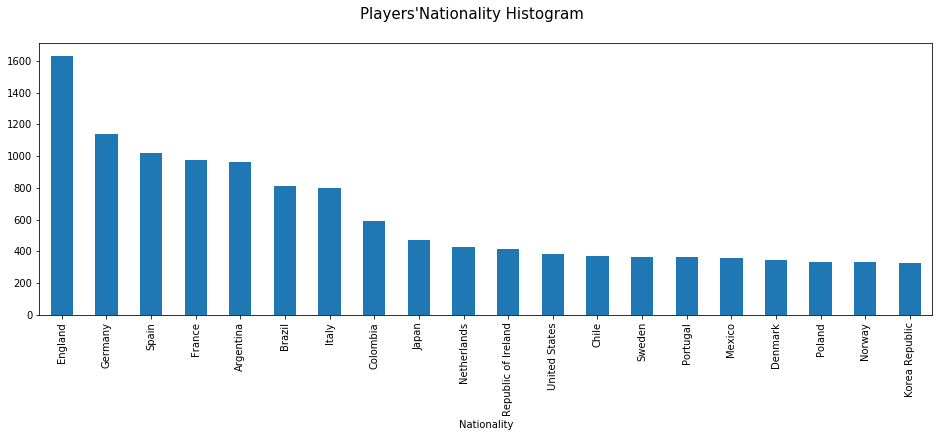

In [40]:
#Review about nationality
players = fifa18_data[["Name", "Age", "Club", "Nationality"]].dropna()
players.groupby("Nationality").Name.count().sort_values(ascending=False).head(20).plot(kind="bar", figsize=(16,5))
pl.suptitle("Players'Nationality Histogram",fontsize=15)

Text(0.5, 0.98, "Players'Nationality Pie Chart with the most relevant 15 Nationalities")

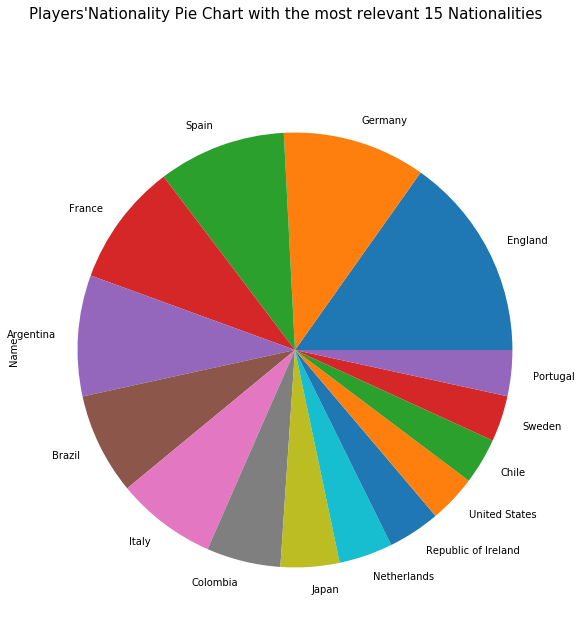

In [41]:
#Players'Nationality Pie Chart
players.groupby("Nationality").Name.count().sort_values(ascending=False).head(15).plot(kind="pie", figsize=(10,10))
pl.suptitle("Players'Nationality Pie Chart with the most relevant 15 Nationalities",fontsize=15)

In [42]:
#Categorical data analysis for Country and Language JSON data
lbl = LabelEncoder()

data_cat = New_df.apply(lbl.fit_transform)
data_cat[:5]

,Country,Language
0,4,13
1,234,3
2,0,50
3,7,21
4,6,21


In [43]:
#Integrated DataFrame between categorical and numerical data
integrated_df = pd.DataFrame(list(zip(data_cat['Country'], data_cat['Language'], country_list, language_match2)), 
               columns =['cat_country', 'cat_language', 'Country', 'Language'])
integrated_df[:10]

,cat_country,cat_language,Country,Language
0,4,13,Andorra,Catalan
1,234,3,United Arab Emirates,Arabic
2,0,50,Afghanistan,Pashto
3,7,21,Antigua and Barbuda,English
4,6,21,Anguilla,English
5,1,1,Albania,Albanian
6,9,4,Armenia,Armenian
7,5,53,Angola,Portuguese
8,8,63,Argentina,Spanish
9,3,21,American Samoa,English


/home/ronny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


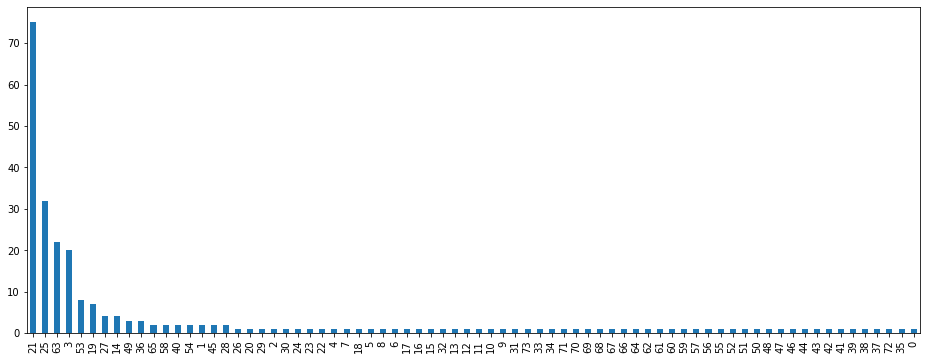

In [44]:
fig = plt.figure(figsize=(16,6))
pd.Series(integrated_df['cat_language']).value_counts().plot('bar')
plt.show()

According to this result, the language speaks of the world is English, followed by French and Spanish. 

In [45]:
#Making a similar analysis with Football players languages

players_C_L = pd.DataFrame(list(zip(player_country, language_match)), 
               columns =['Country_cat', 'Language_cat'])

lbl = LabelEncoder()

players_CL_cat = players_C_L.apply(lbl.fit_transform)
players_CL_cat.head()

,Country_cat,Language_cat
0,121,47
1,5,57
2,18,47
3,158,57
4,58,20


In [46]:
#Player country and language
players_C_L[:15]

,Country_cat,Language_cat
0,PORTUGAL,PORTUGUESE
1,ARGENTINA,SPANISH
2,BRAZIL,PORTUGUESE
3,URUGUAY,SPANISH
4,GERMANY,GERMAN
5,POLAND,POLISH
6,SPAIN,SPANISH
7,BELGIUM,FRENCH
8,GERMANY,GERMAN
9,ARGENTINA,SPANISH


/home/ronny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


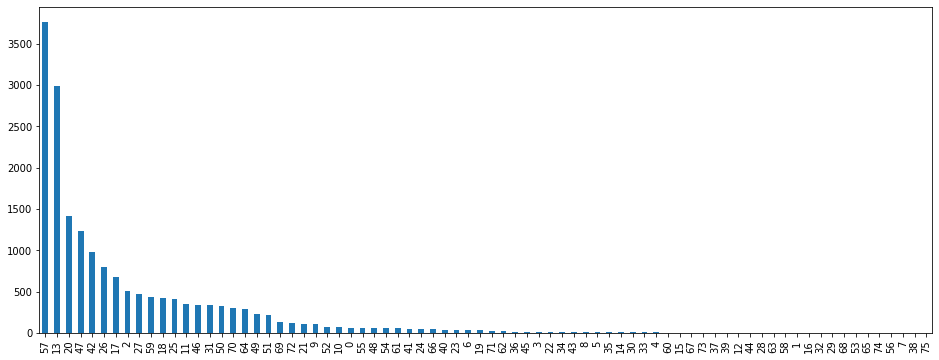

In [47]:
fig = plt.figure(figsize=(16,6))
pd.Series(players_CL_cat['Language_cat']).value_counts().plot('bar')
plt.show()

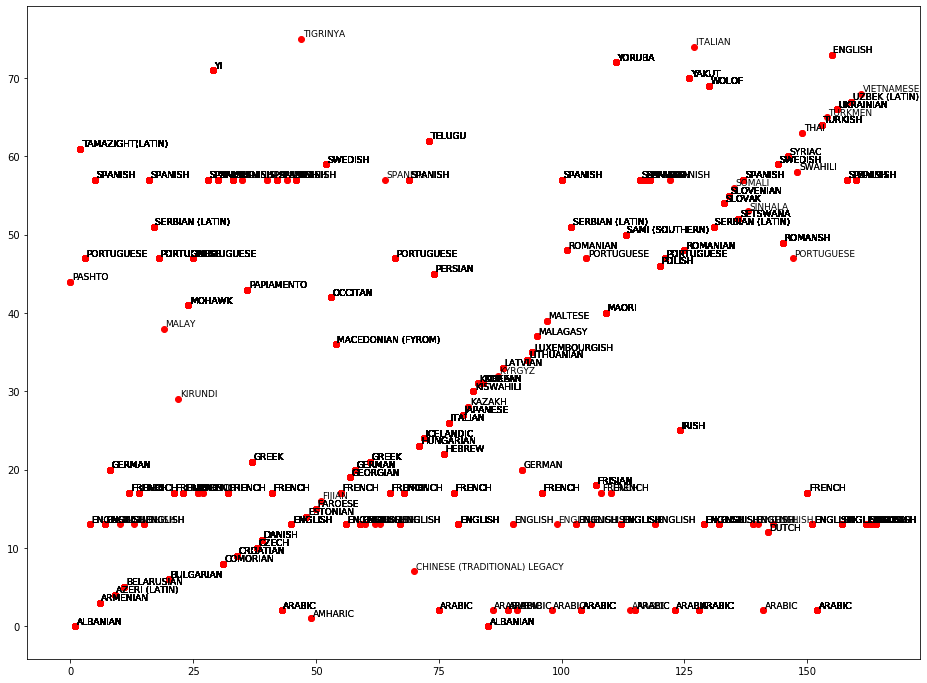

In [48]:
#Scatter Plot between Football Players Counties Vs. Nationalities
types = players_C_L['Language_cat']
plt.figure(figsize=(16,12))
x_coords = players_CL_cat['Country_cat']
y_coords = players_CL_cat['Language_cat']

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.show()

In [49]:
#Preparing the data set
y = players_CL_cat['Language_cat']
y.columns = ['Language']

X = players_CL_cat.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#Clustering
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [51]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 15   0   0 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0 126 ...   0   0   0]
 ...
 [  0   0   0 ...   8   0   0]
 [  0   0   0 ...   0  28   0]
 [  0   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.00      0.00      0.00         1
           2       0.98      1.00      0.99       126
           3       1.00      1.00      1.00         4
           4       0.00      0.00      0.00         4
           5       0.20      1.00      0.33         1
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        84
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00       7

/home/ronny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


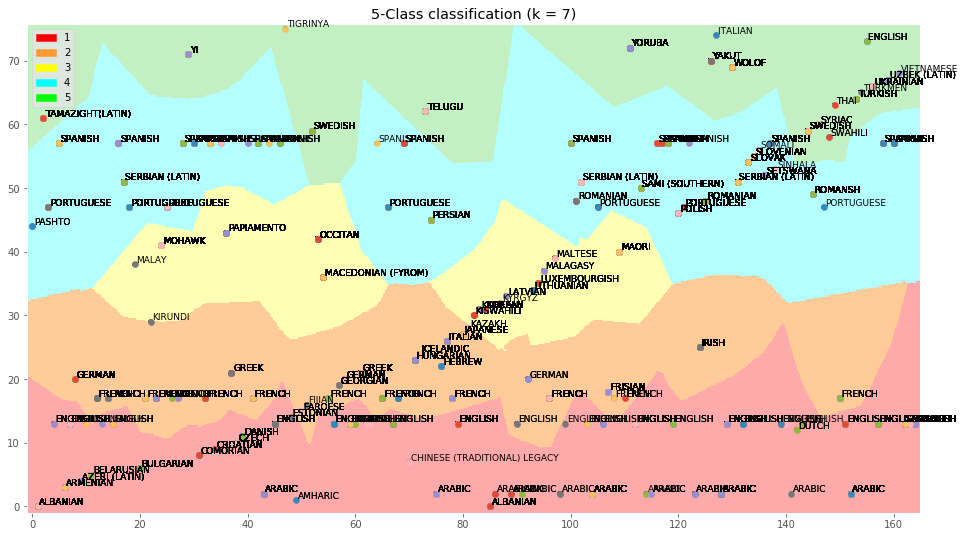

In [52]:
# Create color maps
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

h = 0.2
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, algorithm='auto')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i)"
              % (n_neighbors))

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y)
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.show()

Checking the previous scatter plot, we can see that the football player languages are aligned in the horizontal direction. So, the KNN classification is correct. 

## Objetive 3

In this section, the principal objective in focus on to extract information on social media to obtain information about the new game FIFA 20. We need to detect the sentiment of the localization game for different countries.

In [53]:
#Credential for to get access to Twitter app
{
    "tags": [
        "remove_input",
    ]
}
# @hidden_cell
consumer_key = 'QvXr1zeEY23RkkVtuPlznMsum'
consumer_key_secret = 'SiVCmu6y4Bwjeecy07FLzT93vwnLXpwZcHOGYLadOn1olQfVkN'
access_token = '43378610-7PZx0rq8zrDt6Ypqo18lfYsRJb2z7g3E6iQBgFA6p'
access_token_secret = 'N40IJpdB5LFj5S207s7PuCQb33zxk9saI8aLLjJkjRdCu'

In [54]:
max_tweets = 1000

key_pwd = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

key_pwd.set_access_token(access_token, access_token_secret)

api_req = tweepy.API(key_pwd)

In [55]:
#Twitter search
public_tweets = api_req.search('fifa20', count=100)

In [56]:
positive_list = []
negative_list = []
neutral_list = []

for tweet in public_tweets:    
    print(tweet.text)    
    analysis = TextBlob(tweet.text)    
    print(analysis.sentiment)    
    if analysis.sentiment[0]>0:
        positive_list.append(analysis)
        print('Positive')
    elif analysis.sentiment[0]<0:
        negative_list.append(analysis)
        print('Negative')
    else:
        neutral_list.append(analysis)
        print('Neutral')

RT @FUTJack__: If you don’t RT this tweet then these will be your player picks tomorrow....

CHOICE IS YOURS 🤷🏼‍♂️

#FIFA20 #TOTW6 https://…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
📢 Je démarre un 🔴 LIVE sur #FIFA20 ! https://t.co/U9b4yyV535 #wizebot #twitch
Sentiment(polarity=0.17045454545454544, subjectivity=0.5)
Positive
RT @MorgsFIFA: REWARDS DAY GIVEAWAY! 

▫️Pack Griezmann (Red or IF) = 4.6k FP
▫️Pack Ben Yedder (Red or IF) = 2.2k FP

RT &amp; follow @MorgsFI…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NepentheZ: #FIFA20 ?

Completed it mate. https://t.co/h6oEoaIahb
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @MorgsFIFA: REWARDS DAY GIVEAWAY! 

▫️Pack Griezmann (Red or IF) = 4.6k FP
▫️Pack Ben Yedder (Red or IF) = 2.2k FP

RT &amp; follow @MorgsFI…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @BadeschlappenLP: 🎉 24h Livestream 🎉

Wann? 👉 Freitag ab 15 Uhr!
Was? 👉 #FIFA20, Giveaways &amp; vieles mehr!
Wo? 👉 https://t.co/6ecTvylVIj…
Sentiment(p

In [57]:
#Statistics from sentiment analysis
total= len(positive_list) + len(negative_list) + len(neutral_list)

print("Positive tweets percentage: {} %".format(100*len(positive_list)/total))
print("Negative tweets percentage: {} %".format(100*len(negative_list)/total))
print("Neutral tweets percentage: {} %".format(100*len(neutral_list)/total))

Positive tweets percentage: 30.0 %
Negative tweets percentage: 4.0 %
Neutral tweets percentage: 66.0 %


One way to verificate if this results about Fifa20, is using the online tool available. In this case was used NCSU Tweet Sentiment Visualization App (Web App), this app was developed by: Dr. Christopher Healey, Goodnight Distinguished Professor in the Institute of Advanced Analytics at North Carolina State University, has built one of the most robust and highly functional free tools for Twitter sentiment analysis out there: the Tweet Visualizer. The NCSU Tweet Visualizer is particularly strong, because it simply enter a keyword, and the Tweet Visualizer automatically pulls recent tweets (from the past week, though the time range is shorter for popular subjects).

![Sentiment Analysis](Twitter_1.png "Sentiment Analysis from https://www.csc2.ncsu.edu/faculty/healey/tweet_viz/tweet_app/ web page")

![Sentiment Analysis](Twitter_2.png "Sentiment Analysis from https://www.csc2.ncsu.edu/faculty/healey/tweet_viz/tweet_app/ web page")

![Sentiment Analysis](Twitter_3.png "Sentiment Analysis from https://www.csc2.ncsu.edu/faculty/healey/tweet_viz/tweet_app/ web page")